In [2]:
import numpy as np
import pandas as pd 
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

In [45]:
import os
for dirname, _, filenames in os.walk('../my_dataset/yale/data'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        print(filename)

subject01.centerlight
subject01.glasses
subject01.happy
subject01.leftlight
subject01.noglasses
subject01.normal
subject01.rightlight
subject01.sad
subject01.sleepy
subject01.surprised
subject01.wink
subject02.centerlight
subject02.glasses
subject02.happy
subject02.leftlight
subject02.noglasses
subject02.normal
subject02.rightlight
subject02.sad
subject02.sleepy
subject02.surprised
subject02.wink
subject03.centerlight
subject03.glasses
subject03.happy
subject03.leftlight
subject03.noglasses
subject03.normal
subject03.rightlight
subject03.sad
subject03.sleepy
subject03.surprised
subject03.wink
subject04.centerlight
subject04.glasses
subject04.happy
subject04.leftlight
subject04.noglasses
subject04.normal
subject04.rightlight
subject04.sad
subject04.sleepy
subject04.surprised
subject04.wink
subject05.centerlight
subject05.glasses
subject05.happy
subject05.leftlight
subject05.noglasses
subject05.normal
subject05.rightlight
subject05.sad
subject05.sleepy
subject05.surprised
subject05.wink


In [24]:
from matplotlib import pyplot as plt
import cv2
from PIL import Image
import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle

(243, 320, 3)


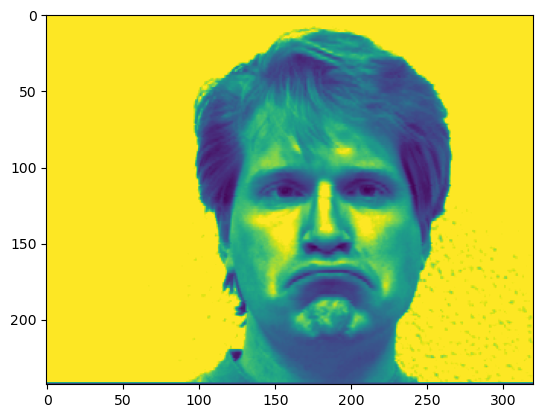

In [9]:
DIRECTORY = "../my_dataset/yale/data/"
IMAGE = "subject01.sad"
filename = DIRECTORY + IMAGE
pixels = plt.imread(filename)

rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)
plt.imshow(pixels)
plt.show()

In [11]:
import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
detector = MTCNN()

# Detect the faces within the image
results = detector.detect_faces(rgb_pixels)
results

[{'box': [119, 61, 125, 164],
  'confidence': 0.9999946355819702,
  'keypoints': {'left_eye': (155, 117),
   'right_eye': (210, 118),
   'nose': (185, 144),
   'mouth_left': (161, 182),
   'mouth_right': (209, 181)}}]

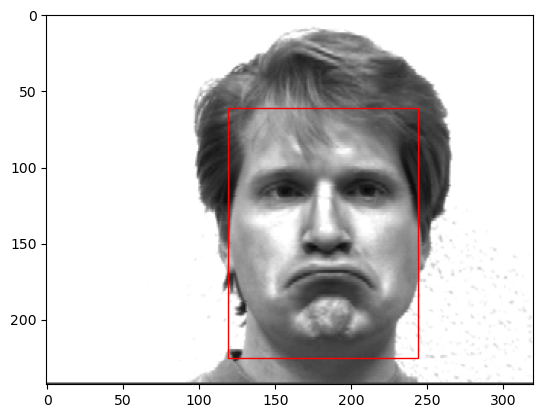

In [12]:
def draw_image_with_boxes(data, result_list):
    plt.imshow(data)
    
    ax = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box']
        
        rect = Rectangle((x, y), width, height, fill =False, color='red')
        ax.add_patch(rect)
        
    plt.show()
    
# display faces on the original image
draw_image_with_boxes(rgb_pixels, results)

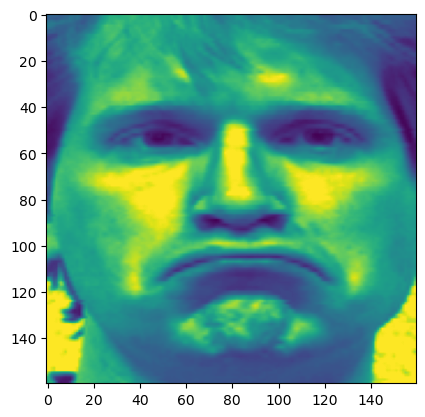

In [13]:
def extract_face_from_file(filename, required_size=(160, 160)):
    image = Image.open(filename)
    
    return extract_face(image, required_size)

def extract_face(image, required_size=(160, 160)):
    # convert to RGB
    image = image.convert('RGB')
    
    pixels = np.asarray(image)
    
    results = detector.detect_faces(pixels)
    
    x1, y1, width, height = results[0]['box']
    
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    face = pixels[y1:y2, x1:x2]
    
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)
    
    return gray_face

detector = MTCNN()

face_pixels = extract_face_from_file(filename)

plt.imshow(face_pixels)

In [18]:
suffix = filename.split('/')[-1]
suffix

'subject01.sad'

In [21]:
face_pixels

array([[ 93,  90,  90, ...,  82,  84,  85],
       [ 88,  87,  85, ...,  78,  77,  76],
       [ 81,  83,  82, ...,  76,  73,  72],
       ...,
       [170, 157, 119, ..., 255, 255, 255],
       [160, 161, 133, ..., 255, 255, 255],
       [157, 163, 161, ..., 255, 255, 255]], dtype=uint8)

In [37]:
cv2.imwrite(suffix+".png", face_pixels)

True

In [48]:
for dirname, _, filenames in os.walk('../my_dataset/yale/data'):
    for IMAGE in filenames:
        # print(os.path.join(dirname, filename))
        filename = DIRECTORY + IMAGE
        face_pixels = extract_face_from_file(filename)
        suffix = filename.split('/')[-1]
        cv2.imwrite(suffix+".png", face_pixels)
        print(suffix)

subject01.centerlight
subject01.glasses
subject01.happy
subject01.leftlight
subject01.noglasses
subject01.normal
subject01.rightlight
subject01.sad
subject01.sleepy
subject01.surprised
subject01.wink
subject02.centerlight
subject02.glasses
subject02.happy
subject02.leftlight
subject02.noglasses
subject02.normal
subject02.rightlight
subject02.sad
subject02.sleepy
subject02.surprised
subject02.wink
subject03.centerlight
subject03.glasses
subject03.happy
subject03.leftlight
subject03.noglasses
subject03.normal
subject03.rightlight
subject03.sad
subject03.sleepy
subject03.surprised
subject03.wink
subject04.centerlight
subject04.glasses
subject04.happy
subject04.leftlight
subject04.noglasses
subject04.normal
subject04.rightlight
subject04.sad
subject04.sleepy
subject04.surprised
subject04.wink
subject05.centerlight
subject05.glasses
subject05.happy
subject05.leftlight
subject05.noglasses
subject05.normal
subject05.rightlight
subject05.sad
subject05.sleepy
subject05.surprised
subject05.wink
